### Final Project: Modeling Coral Bleaching
#### Rebecca Cawkwell rgc2137 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from IPython.display import Image

In [2]:
#Image(filename ='before_after.jpg')

#  Part 1: Model Construction

Bleaching (Seciton 2.2.3, Equation 4): 
This equation models the transition from Healthy to pale to bleached.  The variables respond 

1. g_b is the Bleaching Constant (determined in the paper - constant regardless of coral species)
2. c_sp is the species constant (dependent on species of coral)
3. alpha - the adapted response temperature depedence (equation below will calculate)
4. beta - the thermal envelope  (equation below will calcualte)
5. matrix_1 - corresponds to the transition between the four coral states (in this case only effecting Healthy, Pale, and Bleached)
6. coral - is the current matrix that represents the coral that is healthy, recovering, pale, and bleached

In [3]:
#modeling bleaching 
def bleaching(g_b, c_sp, Q, alpha, beta, coral): 
    #matrix_1 = np.array([[1,0,-1,0],[0,0,0,0],[0,0,.5,-.5],[0,0,0,.25]])
    matrix_1 = np.array([[.1,0,0,0],[0,0,0,0],[0,0,.005,-.005],[0,0,0,.0025]])
    mat_1 = np.matmul(matrix_1, coral)
    coral = g_b*c_sp*Q*alpha*beta*mat_1
    #print(coral)
    return coral

Recovery from Bleaching (2.2.4 / Equation 5) 

After changes in temperature, coral can recover from bleaching. Coral that is in a recovery state has a healthy appearance but has a supressed calcificaiton, growth and reproduction. 

The variables used explained: 
1. g_m is the mortality constant (determined in the paper) 
2. c_sp, alpha, beta, coral are the same as above 
3. Q is the daily average solar irradiaiton (for day of year and the latitude)
4. matrix_1 is used in the first half of the equation to represent the possibility that a coral that is in recovery, even during a period of time when the temperature is acceptable, the coral could still die. 
5. matrix_2 represents the recovery from bleaching from bleached to pale, pale to recovering, and recovering to healthy

In [4]:
#Recovery from bleaching 
def recovering_from_bleaching(C_sp, Q, alpha, beta, coral): 
    matrix_1 = np.array([[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,-1]])
    matrix_2 = np.array([[0,.5*C_sp,0,0], [0,-1*.5*C_sp,C_sp,0], [0,0,-1*C_sp,8/C_sp], [0,0,0,-8/C_sp]])
    mat_1= np.matmul(matrix_1, coral)
    mat_2 = np.matmul(matrix_2, coral)
    g_m = .4
    g_r = .2
    #possibility of mortality
    coral = g_m*C_sp*Q*mat_1
    #possibility of recovery
    coral += g_r*C_sp*Q*alpha*beta*mat_2
    return coral

Growth Constant (Section 2.2.5/ Equation 6) 

This equation models the growth of coral, natural mortality and constraints on frowth due to carrying capacity. 

The variables used: 
1. g_c - growth constant - chosen as .002
2. C_sp, Q, alpha, beta are the same as above 
3. matrix_1 represents that this formula only serves to model growth of healthy coral
4. bottleneck - represents the logisitc growth, that shows there is a reduction in the growth rate as the total population approaches carrying capacity (in this case carrying capacity is set to 100% aka 1) 

In [5]:
#growth constant 
def growth(c_sp, Q, alpha, beta, coral): 
    matrix_1 = np.array([[1,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
    K = 1 #carrying capacity
    bottleneck = K - coral_health[0]
    g_c = .002
    mat_1 = np.matmul(matrix_1, coral)
    coral = g_c*c_sp*Q*alpha*beta*bottleneck*mat_1
    return coral

Determining the adapted temperature range (alpha) Equation 7: 

In [6]:
#modeling the temperature responses (alpha)
def alpha_calc(T, T_opt, dt): 
    T_lo = T_opt - (1/np.exp(1/3))*dt
    T_hi = T_lo + dt
    #if T > T_lo: 
        #else: 
    #    return -alpha_max
    return -1*(T-T_lo)*((T-T_lo)**2 -dt**2)*4*10**(-4)*np.exp(-.33*(dt-10))


2.3 The thermal envelope (beta) Equation 8

In [7]:
#beta 
def beta_calc(T_opt): 
    E_a = 50
    R = 8.314 #j/mol
    return np.exp(E_a/R*(1/300-1/T_opt))

### Testing Modeling

Given in 1998 (before the first major coral bleaching event), 11% of coral was dead and 16% not fully functional due to bleaching. 

In [8]:
healthy = np.array([73.])
recovering = np.array([0.])
pale = np.array([16.])
dead = np.array([11.])
coral_health = np.array([healthy, recovering, pale, dead ])

In [9]:
t = 1
g_b = 8
c_sp = 1 
Q = 1 
T_opt = 16
dt = 5
T = [29,28, 29.7, 30.3, 31.8, 30, 29, 28, 26, 26, 27, 29]
beta = beta_calc(T_opt) 

while t < 12: 
    alpha = alpha_calc(T_opt, T[t], dt)
    coral_health += recovering_from_bleaching(c_sp, Q, alpha, beta, coral_health)
    coral_health += growth(c_sp, Q, alpha, beta, coral_health)
    #coral_health -= bleaching(g_b, c_sp, Q, alpha, beta, coral_health)

    healthy = np.append(healthy,coral_health[0])
    recovering = np.append(recovering, coral_health[1])
    pale = np.append(pale,coral_health[2])
    dead = np.append(dead,coral_health[3])
    t += 1

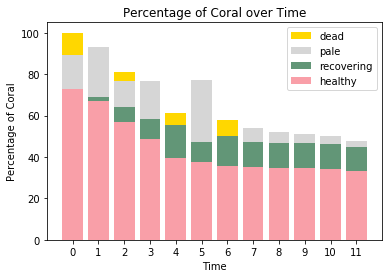

In [10]:
months = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
ind = [x for x, _ in enumerate(months)]

plt.bar(ind, dead, width=0.8, label='dead', color='gold', bottom=pale+recovering+healthy)
plt.bar(ind, pale, width=0.8, label='pale', color='#D6D6D6', bottom=recovering+healthy)
plt.bar(ind, recovering, width=0.8, label='recovering', color='#629677', bottom=healthy)
plt.bar(ind, healthy, width=0.8, label='healthy', color='#F99FA8')

plt.xticks(ind, months)
plt.ylabel("Percentage of Coral")
plt.xlabel("Time")
plt.legend(loc="upper right")
plt.title("Percentage of Coral over Time")

plt.show()

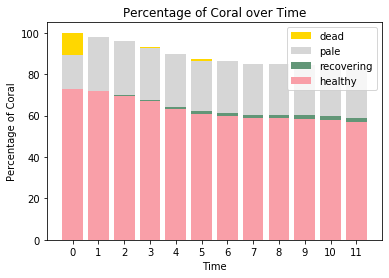

In [11]:
# Manipulating the Variables 
healthy = np.array([73.])
recovering = np.array([0.])
pale = np.array([16.])
dead = np.array([11.])
coral_health = np.array([healthy, recovering, pale, dead ])
t = 1
g_b = 8
c_sp = .2
Q = 1 
T_opt = 16
dt = 5
T = [29,28, 29.7, 30.3, 31.8, 30, 29, 28, 26, 26, 27, 29]
beta = beta_calc(T_opt) 

while t < 12: 
    alpha = alpha_calc(T_opt, T[t], dt)
    coral_health += recovering_from_bleaching(c_sp, Q, alpha, beta, coral_health)
    coral_health += growth(c_sp, Q, alpha, beta, coral_health)
    #coral_health -= bleaching(g_b, c_sp, Q, alpha, beta, coral_health)

    healthy = np.append(healthy,coral_health[0])
    recovering = np.append(recovering, coral_health[1])
    pale = np.append(pale,coral_health[2])
    dead = np.append(dead,coral_health[3])
    t += 1
plt.bar(ind, dead, width=0.8, label='dead', color='gold', bottom=pale+recovering+healthy)
plt.bar(ind, pale, width=0.8, label='pale', color='#D6D6D6', bottom=recovering+healthy)
plt.bar(ind, recovering, width=0.8, label='recovering', color='#629677', bottom=healthy)
plt.bar(ind, healthy, width=0.8, label='healthy', color='#F99FA8')

plt.xticks(ind, months)
plt.ylabel("Percentage of Coral")
plt.xlabel("Time")
plt.legend(loc="upper right")
plt.title("Percentage of Coral over Time")

plt.show()

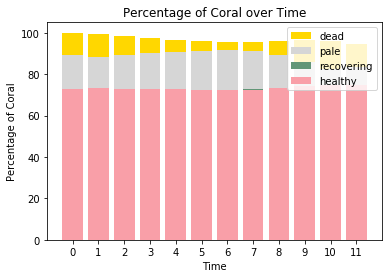

In [12]:
# Manipulating the Variables 
healthy = np.array([73.])
recovering = np.array([0.])
pale = np.array([16.])
dead = np.array([11.])
coral_health = np.array([healthy, recovering, pale, dead ])
t = 1
g_b = 8
c_sp = .2
Q = 1 
T_opt = 30
dt = 5
T = [29,28, 29.7, 30.3, 31.8, 30, 29, 28, 26, 26, 27, 29]
beta = beta_calc(T_opt) 

while t < 12: 
    alpha = alpha_calc(T_opt, T[t], dt)
    coral_health += recovering_from_bleaching(c_sp, Q, alpha, beta, coral_health)
    coral_health += growth(c_sp, Q, alpha, beta, coral_health)
    #coral_health -= bleaching(g_b, c_sp, Q, alpha, beta, coral_health)

    healthy = np.append(healthy,coral_health[0])
    recovering = np.append(recovering, coral_health[1])
    pale = np.append(pale,coral_health[2])
    dead = np.append(dead,coral_health[3])
    t += 1
plt.bar(ind, dead, width=0.8, label='dead', color='gold', bottom=pale+recovering+healthy)
plt.bar(ind, pale, width=0.8, label='pale', color='#D6D6D6', bottom=recovering+healthy)
plt.bar(ind, recovering, width=0.8, label='recovering', color='#629677', bottom=healthy)
plt.bar(ind, healthy, width=0.8, label='healthy', color='#F99FA8')

plt.xticks(ind, months)
plt.ylabel("Percentage of Coral")
plt.xlabel("Time")
plt.legend(loc="upper right")
plt.title("Percentage of Coral over Time")

plt.show()

##  Part 2: Average Yearly Calcificaiton

The article concludes with a simplified equation to model the average yearly calcification of coral. Below models the average calcification equation given at the end of the article

In [13]:
def avg_calcification(dt, T_ave):
    A = 1.8 
    E_a = 50 
    delta = 0
    R = 8.314 #j/mol
    G_average = A*np.exp(E_a/R*(1/T_ave-1/300))*1/(dt**(1-delta))
    return G_average

Text(0.5, 1.0, 'Average Calcification Rate over 10 Years')

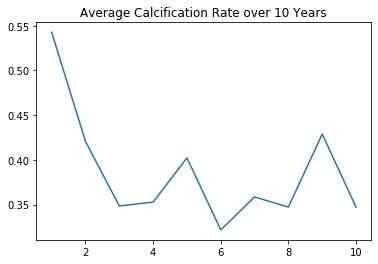

In [14]:
t = np.linspace(1,10,10)
#dt = np.zeros(10)
#for i in range(10): 
#    dt[i] = random.randint(1,20)
dt = [4, 5.2, 6.2,6.1, 5.3,6.8,6.1,6.3,5.1,6.3,7]
temp = [29,28, 29.7, 30.3, 31.8, 28, 28, 28, 28, 28]
G_avg = []
for i in range(10): 
    G_avg.append(avg_calcification(dt[i], temp[i]))
plt.plot(t,G_avg)
plt.title('Average Calcification Rate over 10 Years')